<a href="https://colab.research.google.com/github/khushisachdev/web-development-projects/blob/master/Credit_card_approval_algorithm_but_with_modification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
from google.colab import drive
!pip install tensorflow_decision_forests

another approach


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Class Distribution Before SMOTE: {0.0: 204, 1.0: 258}
Class Distribution After SMOTE: {0.0: 258, 1.0: 258}

Logistic Regression Results:
Accuracy: 0.8421052631578947
Confusion Matrix:
 [[95  8]
 [28 97]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.92      0.84       103
         1.0       0.92      0.78      0.84       125

    accuracy                           0.84       228
   macro avg       0.85      0.85      0.84       228
weighted avg       0.86      0.84      0.84       228



<ipython-input-11-caf7173d3e4e>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cc_apps[col].fillna(cc_apps[col].mode()[0], inplace=True)



Random Forest Results:
Accuracy: 0.8640350877192983
Confusion Matrix:
 [[ 90  13]
 [ 18 107]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       103
         1.0       0.89      0.86      0.87       125

    accuracy                           0.86       228
   macro avg       0.86      0.86      0.86       228
weighted avg       0.87      0.86      0.86       228



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:09:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
Accuracy: 0.8157894736842105
Confusion Matrix:
 [[ 84  19]
 [ 23 102]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.82      0.80       103
         1.0       0.84      0.82      0.83       125

    accuracy                           0.82       228
   macro avg       0.81      0.82      0.81       228
weighted avg       0.82      0.82      0.82       228



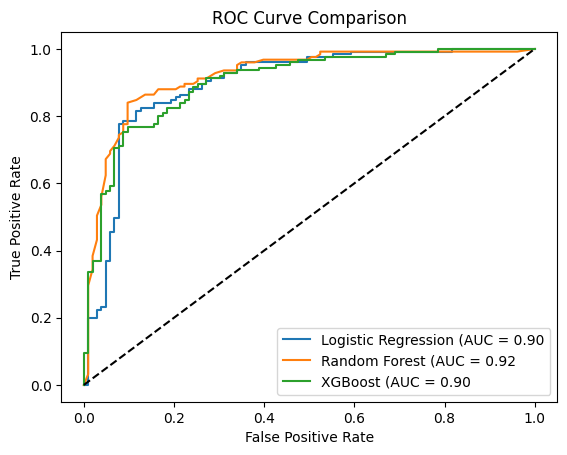

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util


Best Hyperparameters for Random Forest: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy Score: 0.8837378640776699


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Step 1: Load Dataset from Google Drive
drive.mount('/content/drive')
dataset_path = "/content/drive/My Drive/crx.data"
cc_apps = pd.read_csv(dataset_path, header=None)

# Step 2: Data Preprocessing
cc_apps.replace('?', np.nan, inplace=True)

# Fill numeric columns with mean, categorical with mode
cc_apps.fillna(cc_apps.select_dtypes(include=['number']).mean(), inplace=True)
for col in cc_apps.select_dtypes(include=['object']).columns:
    cc_apps[col].fillna(cc_apps[col].mode()[0], inplace=True)

# Encode categorical values
le = LabelEncoder()
for col in cc_apps.select_dtypes(include=['object']).columns:
    cc_apps[col] = le.fit_transform(cc_apps[col])

# Drop irrelevant columns
cc_apps = cc_apps.drop([11, 13], axis=1)

# Convert DataFrame to NumPy array
cc_apps = cc_apps.to_numpy()
X, y = cc_apps[:, :-1], cc_apps[:, -1]

# Step 3: Split Data into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Step 4: Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Check Class Imbalance and Apply SMOTE if Needed
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution Before SMOTE:", class_distribution)
if min(class_distribution.values()) / max(class_distribution.values()) < 0.8:
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)
    unique, counts = np.unique(y_train, return_counts=True)
    print("Class Distribution After SMOTE:", dict(zip(unique, counts)))

# Step 6: Train and Evaluate Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f}')

# Step 7: Plot ROC Curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Step 8: Hyperparameter Tuning for Best Model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print("\nBest Hyperparameters for Random Forest:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)


In [ ]:
model_path = "/content/drive/My Drive/random_forest_model.pkl"
scaler_path = "/content/drive/My Drive/scaler.pkl"
y_test_path = "/content/drive/My Drive/y_test.pkl"
X_test_path = "/content/drive/My Drive/X_test.pkl"

In [ ]:
# Convert to TensorFlow Decision Forests format
# Instead of load_from_sklearn, create a new TFDF model and train it
# using the same parameters as your scikit-learn model.
import tensorflow_decision_forests as tfdf
rf_model_tf = tfdf.keras.RandomForestModel(
    num_trees=200,
    max_depth=7,
    # Other parameters you used in your scikit-learn model
)
# Train the TFDF model
rf_model_tf.fit(x=X_train_scaled, y=y_train)

rf_model_tf.save(model_path)
model = tfdf.keras.RandomForestModel()
model.save("/content/drive/My Drive/random_forest_model.keras")  # Keras format

#rf_model_tf.save("/content/drive/My Drive/random_forest_model.keras")  # Save in Keras 3 format
#rf_model_tf.save("/content/drive/My Drive/random_forest_model.h5")


# Save the scaler as a NumPy array
np.save(scaler_path, scaler.scale_)

# Save X_test and y_test as CSV
np.savetxt(X_test_path, X_test_scaled, delimiter=",")
pd.DataFrame(y_test).to_csv(y_test_path, index=False)

print(f"Model saved to {model_path}")
print(f"Scaler saved to {scaler_path}")



Use /tmp/tmptuv32gr7 as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.745061. Found 516 examples.
Training model...
Model trained in 0:00:00.377441
Compiling model...


Model compiled.


TypeError: 'RandomForestModel' object cannot be interpreted as an integer

In [ ]:
import os

# Define paths
model_path = "/content/drive/My Drive/random_forest_model_tf"
scaler_path = "/content/drive/My Drive/scaler.npy"
X_test_path = "/content/drive/My Drive/X_test.csv"
y_test_path = "/content/drive/My Drive/y_test.csv"
model2_path = "/content/drive/My Drive/random_forest_model.keras"

# Check if files exist
files = [model_path, scaler_path, X_test_path, y_test_path,model2_path]

for file in files:
    if os.path.exists(file):
        print(f"✅ File exists: {file}")
    else:
        print(f"❌ File missing: {file}")


✅ File exists: /content/drive/My Drive/random_forest_model_tf
✅ File exists: /content/drive/My Drive/scaler.npy
✅ File exists: /content/drive/My Drive/X_test.csv
✅ File exists: /content/drive/My Drive/y_test.csv
✅ File exists: /content/drive/My Drive/random_forest_model.keras
